# Soluções de Ciência de Dados Titanic

### Este notebook é um complemento para o livro [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312).

Este notebook nos guia por um fluxo de trabalho típico para resolver competições de ciência de dados em sites como o Kaggle.

Existem vários notebooks excelentes para estudar as entradas de competições de ciência de dados. No entanto, muitos pulam algumas explicações sobre como a solução é desenvolvida, pois esses notebooks são criados por especialistas para especialistas. O objetivo deste notebook é seguir um fluxo de trabalho passo a passo, explicando cada etapa e o raciocínio por trás de cada decisão tomada durante o desenvolvimento da solução.

## Etapas do fluxo de trabalho

O fluxo de trabalho para a solução da competição passa por sete estágios descritos no livro Data Science Solutions.

1. Definição do problema ou questão.
2. Obter dados de treinamento e teste.
3. Manipular, preparar e limpar os dados.
4. Analisar, identificar padrões e explorar os dados.
5. Modelar, prever e resolver o problema.
6. Visualizar, relatar e apresentar as etapas de solução do problema e a solução final.
7. Fornecer ou enviar os resultados.

O fluxo de trabalho indica a sequência geral de como cada estágio pode seguir o outro. No entanto, há casos de uso com exceções.

- Podemos combinar várias etapas do fluxo de trabalho. Podemos analisar visualizando os dados.
- Realizar uma etapa antes do indicado. Podemos analisar os dados antes e depois da preparação.
- Realizar uma etapa várias vezes em nosso fluxo de trabalho. A etapa de visualização pode ser usada várias vezes.
- Eliminar completamente uma etapa. Podemos não precisar da etapa de fornecimento para viabilizar ou habilitar nosso conjunto de dados para uma competição.

## Definição da questão e do problema

Sites de competição como o Kaggle definem o problema a ser resolvido ou as perguntas a serem feitas, fornecendo os conjuntos de dados para treinar seu modelo de ciência de dados e testar os resultados do modelo em um conjunto de dados de teste. A definição da questão ou problema para a competição de Sobrevivência no Titanic está [descrita aqui no Kaggle](https://www.kaggle.com/c/titanic).

> Sabendo, a partir de um conjunto de treinamento de amostras que lista passageiros que sobreviveram ou não ao desastre do Titanic, nosso modelo pode determinar, com base em um conjunto de dados de teste que não contém informações de sobrevivência, se esses passageiros no conjunto de teste sobreviveram ou não.

Também podemos querer desenvolver uma compreensão inicial sobre o domínio do nosso problema. Isso é descrito na [página de descrição da competição do Kaggle aqui](https://www.kaggle.com/c/titanic). Aqui estão os destaques a serem observados.

- Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 dos 2224 passageiros e tripulantes. Isso resulta em uma taxa de sobrevivência de 32%.
- Uma das razões pelas quais o naufrágio resultou em tanta perda de vidas foi a falta de botes salva-vidas suficientes para os passageiros e tripulação.
- Embora houvesse algum elemento de sorte envolvido na sobrevivência ao naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

## Objetivos do fluxo de trabalho

O fluxo de trabalho das soluções de ciência de dados resolve sete grandes objetivos.

**Classificação.** Podemos querer classificar ou categorizar nossas amostras. Também podemos querer entender as implicações ou a correlação de diferentes classes com nosso objetivo de solução.

**Correlação.** Podemos abordar o problema com base nos recursos disponíveis no conjunto de dados de treinamento. Quais recursos dentro do conjunto de dados contribuem significativamente para nosso objetivo de solução? Estatisticamente falando, existe uma [correlação](https://en.wikiversity.org/wiki/Correlation) entre uma característica e o objetivo da solução? À medida que os valores das características mudam, o estado da solução também muda, e vice-versa? Isso pode ser testado tanto para características numéricas quanto categóricas no conjunto de dados fornecido. Também podemos querer determinar a correlação entre características diferentes da sobrevivência para objetivos e etapas subsequentes do fluxo de trabalho. Correlacionar certas características pode ajudar a criar, completar ou corrigir recursos.

**Conversão.** Para a etapa de modelagem, é necessário preparar os dados. Dependendo da escolha do algoritmo de modelo, pode ser necessário converter todos os recursos em valores numéricos equivalentes. Por exemplo, converter valores categóricos em texto para valores numéricos.

**Completar.** A preparação dos dados também pode exigir que estimemos quaisquer valores ausentes dentro de um recurso. Os algoritmos de modelo podem funcionar melhor quando não há valores ausentes.

**Correção.** Também podemos analisar o conjunto de dados de treinamento fornecido em busca de erros ou valores possivelmente incorretos dentro dos recursos e tentar corrigir esses valores ou excluir as amostras que contêm os erros. Uma maneira de fazer isso é detectar quaisquer outliers entre nossas amostras ou características. Também podemos descartar completamente um recurso se ele não estiver contribuindo para a análise ou puder distorcer significativamente os resultados.

**Criação.** Podemos criar novos recursos com base em um recurso existente ou em um conjunto de recursos, de forma que o novo recurso siga os objetivos de correlação, conversão e completude.

**Gráficos.** Como selecionar os gráficos e diagramas de visualização corretos, dependendo da natureza dos dados e dos objetivos da solução.

## Refactor Release 2017-Jan-29

We are significantly refactoring the notebook based on (a) comments received by readers, (b) issues in porting notebook from Jupyter kernel (2.7) to Kaggle kernel (3.5), and (c) review of few more best practice kernels.

### User comments

- Combine training and test data for certain operations like converting titles across dataset to numerical values. (thanks @Sharan Naribole)
- Correct observation - nearly 30% of the passengers had siblings and/or spouses aboard. (thanks @Reinhard)
- Correctly interpreting logistic regresssion coefficients. (thanks @Reinhard)

### Porting issues

- Specify plot dimensions, bring legend into plot.


### Best practices

- Performing feature correlation analysis early in the project.
- Using multiple plots instead of overlays for readability.

In [76]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Obter dados

O pacote Python Pandas nos ajuda a trabalhar com nossos conjuntos de dados. Começamos adquirindo os conjuntos de dados de treinamento e teste em **DataFrames** do Pandas. Também combinamos esses conjuntos de dados para executar certas operações em ambos os conjuntos ao mesmo tempo.

In [77]:
train_df = pd.read_csv('../titanic_data.csv')

## Analisar descrevendo os dados

O Pandas também nos ajuda a descrever os conjuntos de dados, respondendo às seguintes perguntas no início do nosso projeto.

**Quais recursos estão disponíveis no conjunto de dados?**

Anotando os nomes dos recursos para manipulá-los ou analisá-los diretamente. Esses nomes de recursos estão descritos na [página de dados do Kaggle aqui](https://www.kaggle.com/c/titanic/data).

In [78]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Quais recursos são categóricos?**

Esses valores classificam as amostras em conjuntos de amostras semelhantes. Entre os recursos categóricos, os valores são nominais, ordinais, de razão ou intervalares? Isso nos ajuda, entre outras coisas, a selecionar os gráficos apropriados para visualização.

- Categóricos: Survived, Sex e Embarked. Ordinal: Pclass.

**Quais recursos são numéricos?**

Quais recursos são numéricos? Esses valores variam de uma amostra para outra. Entre os recursos numéricos, os valores são discretos, contínuos ou baseados em séries temporais? Isso nos ajuda a selecionar os gráficos apropriados para visualização.

- Contínuos: Age, Fare. Discretos: SibSp, Parch.

In [79]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Quais recursos têm tipos de dados mistos?**

Dados numéricos e alfanuméricos dentro do mesmo recurso. Esses são candidatos ao objetivo de correção.

- O recurso **Ticket** é uma mistura de tipos de dados numéricos e alfanuméricos. O recurso **Cabin** é alfanumérico.

**Quais recursos podem conter erros ou erros de digitação?**

É mais difícil revisar isso em um conjunto de dados grande, porém, ao revisar algumas amostras de um conjunto menor, podemos identificar diretamente quais recursos podem precisar de correção.

- O recurso **Name** pode conter erros ou erros de digitação, pois há várias maneiras de descrever um nome, incluindo títulos, parênteses e aspas usadas para nomes alternativos ou abreviados.

In [80]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Quais recursos contêm valores em branco, nulos ou vazios?**

Esses precisarão de correção.

- Os recursos **Cabin > Age > Embarked** contêm um número de valores nulos, nessa ordem, no conjunto de dados de treinamento.
- Os recursos **Cabin > Age** estão incompletos no caso do conjunto de dados de teste.

**Quais são os tipos de dados dos diversos recursos?**

Isso nos ajuda no objetivo de conversão.

- Sete recursos são inteiros ou floats. Seis no caso do conjunto de dados de teste.
- Cinco recursos são strings (objeto).

In [93]:
train_df.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________


**Qual é a distribuição dos valores das características numéricas nas amostras?**

Isso nos ajuda a determinar, entre outros insights iniciais, quão representativo é o conjunto de dados de treinamento em relação ao domínio real do problema.

- O total de amostras é de 891, ou 40% do número real de passageiros a bordo do Titanic (2.224).
- **Survived** é uma característica categórica com valores 0 ou 1.
- Cerca de 38% das amostras sobreviveram, representando a taxa real de sobrevivência de 32%.
- A maioria dos passageiros (> 75%) não viajou com pais ou filhos.
- Quase 30% dos passageiros tinham irmãos e/ou cônjuge a bordo.
- As tarifas variaram significativamente, com poucos passageiros (<1%) pagando até $512.
- Poucos passageiros idosos (<1%) estavam na faixa etária de 65-80 anos.

In [82]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Qual é a distribuição das características categóricas?**

- **Name** é único em todo o conjunto de dados (count = unique = 891).
- A variável **Sex** possui dois valores possíveis, com 65% sendo do sexo masculino (top = masculino, freq = 577/count = 891).
- Os valores de **Cabin** têm várias duplicatas entre as amostras. Alternativamente, vários passageiros compartilharam uma cabine.
- **Embarked** possui três valores possíveis, com o porto **S** sendo o mais usado pela maioria dos passageiros (top = S).
- O recurso **Ticket** tem uma alta proporção (22%) de valores duplicados (unique = 681).

In [83]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


### Suposições baseadas na análise de dados

Chegamos às seguintes suposições com base na análise de dados realizada até agora. Podemos validar essas suposições posteriormente antes de tomar as ações apropriadas.

**Correlação.**

Queremos saber quão bem cada recurso se correlaciona com a sobrevivência. Queremos fazer isso no início do projeto e comparar essas correlações rápidas com as correlações modeladas mais tarde no projeto.

**Completando.**

1. Podemos querer completar o recurso **Age**, pois ele definitivamente está correlacionado com a sobrevivência.
2. Podemos querer completar o recurso **Embarked**, já que ele pode também se correlacionar com a sobrevivência ou com outro recurso importante.

**Correção.**

1. O recurso **Ticket** pode ser descartado de nossa análise, pois contém uma alta proporção de duplicatas (22%) e pode não haver correlação entre o **Ticket** e a sobrevivência.
2. O recurso **Cabin** pode ser descartado, pois está altamente incompleto ou contém muitos valores nulos tanto no conjunto de treinamento quanto no de teste.
3. **PassengerId** pode ser descartado do conjunto de treinamento, pois não contribui para a sobrevivência.
4. O recurso **Name** é relativamente não padronizado e pode não contribuir diretamente para a sobrevivência, então pode ser descartado.

**Criação.**

1. Podemos querer criar um novo recurso chamado **Family** com base nos recursos **Parch** e **SibSp** para obter a contagem total de membros da família a bordo.
2. Podemos querer trabalhar o recurso **Name** para extrair o **Title** como um novo recurso.
3. Podemos querer criar um novo recurso de faixas etárias, convertendo uma característica numérica contínua em uma característica categórica ordinal.
4. Podemos também querer criar um recurso de faixa de tarifas (**Fare range**) se isso ajudar em nossa análise.

**Classificação.**

Podemos também acrescentar às nossas suposições com base na descrição do problema mencionada anteriormente.

1. Mulheres (**Sex=female**) tinham mais chances de sobreviver.
2. Crianças (**Age<?**) tinham mais chances de sobreviver.
3. Passageiros da classe alta (**Pclass=1**) tinham mais chances de sobreviver.

## Análise pivotando características

Para confirmar algumas de nossas observações e suposições, podemos rapidamente analisar as correlações de características pivotando-as umas contra as outras. Podemos fazer isso neste estágio apenas para características que não têm valores vazios. Também faz sentido fazer isso apenas para características que são categóricas (**Sex**), ordinais (**Pclass**) ou de tipo discreto (**SibSp**, **Parch**).

- **Pclass** Observamos uma correlação significativa (>0.5) entre **Pclass=1** e **Survived** (classificação #3). Decidimos incluir essa característica em nosso modelo.
- **Sex** Confirmamos a observação durante a definição do problema de que **Sex=female** teve uma taxa de sobrevivência muito alta de 74% (classificação #1).
- **SibSp e Parch** Essas características têm correlação zero para certos valores. Pode ser melhor derivar uma característica ou um conjunto de características a partir dessas características individuais (criação #1).

In [84]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [85]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [86]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [87]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Análise visualizando dados

Agora podemos continuar confirmando algumas de nossas suposições usando visualizações para analisar os dados.

### Correlacionando características numéricas

Vamos começar entendendo as correlações entre características numéricas e nosso objetivo de solução (**Survived**).

Um gráfico de histograma é útil para analisar variáveis numéricas contínuas como **Age**, onde a divisão em intervalos ou faixas ajudará a identificar padrões úteis. O histograma pode indicar a distribuição das amostras usando bins definidos automaticamente ou faixas de intervalo iguais. Isso nos ajuda a responder a perguntas relacionadas a faixas específicas (bebês tiveram uma taxa de sobrevivência melhor?).

Note que o eixo x nas visualizações de histograma representa a contagem de amostras ou passageiros.

**Observações.**

- Bebês (**Age <=4**) tiveram uma alta taxa de sobrevivência.
- O passageiro mais velho (**Age = 80**) sobreviveu.
- Um grande número de jovens de 15 a 25 anos não sobreviveu.
- A maioria dos passageiros está na faixa etária de 15 a 35 anos.

**Decisões.**

Esta análise simples confirma nossas suposições e orienta decisões para as próximas etapas do fluxo de trabalho.

- Devemos considerar **Age** (nossa suposição de classificação #2) em nosso treinamento de modelo.
- Completar os valores nulos do recurso **Age** (completando #1).
- Devemos categorizar grupos etários em faixas (criando #3).

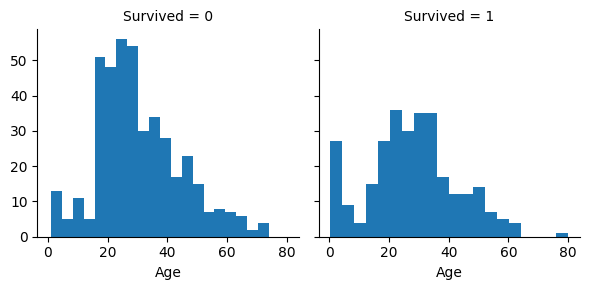

In [88]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlacionando características numéricas e ordinais

Podemos combinar várias características para identificar correlações usando um único gráfico. Isso pode ser feito com características numéricas e categóricas que possuem valores numéricos.

**Observações.**

- **Pclass=3** tinha a maioria dos passageiros, no entanto, a maioria não sobreviveu. Confirma nossa suposição de classificação #2.
- Passageiros bebês em **Pclass=2** e **Pclass=3** sobreviveram em sua maioria. Qualifica ainda mais nossa suposição de classificação #2.
- A maioria dos passageiros em **Pclass=1** sobreviveu. Confirma nossa suposição de classificação #3.
- **Pclass** varia em termos de distribuição etária dos passageiros.

**Decisões.**

- Considerar **Pclass** para o treinamento do modelo.

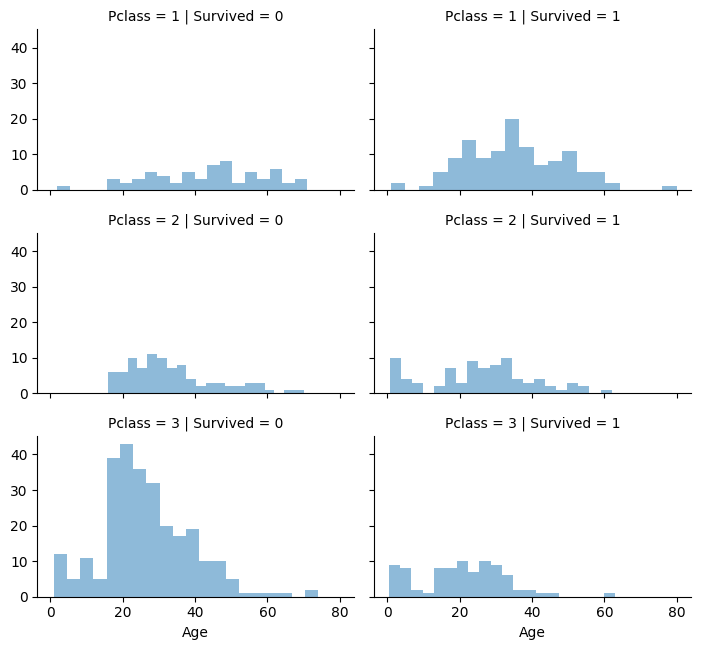

In [89]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlacionando características categóricas

Agora podemos correlacionar as características categóricas com nosso objetivo de solução.

**Observações.**

- Passageiras do sexo feminino tiveram uma taxa de sobrevivência muito melhor do que os homens. Confirma a suposição de classificação (#1).
- Exceção em **Embarked=C**, onde homens tiveram uma taxa de sobrevivência maior. Isso pode ser uma correlação entre **Pclass** e **Embarked** e, por sua vez, entre **Pclass** e **Survived**, não necessariamente uma correlação direta entre **Embarked** e **Survived**.
- Homens tiveram uma melhor taxa de sobrevivência em **Pclass=3** em comparação com **Pclass=2** para os portos **C** e **Q**. Completar (#2).
- Os portos de embarque têm taxas de sobrevivência variáveis para **Pclass=3** e entre passageiros do sexo masculino. Correlacionando (#1).

**Decisões.**

- Adicionar a característica **Sex** ao treinamento do modelo.
- Completar e adicionar a característica **Embarked** ao treinamento do modelo.

c:\Users\renat\Documents\python\Data Science\Titanic\myvenv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\renat\Documents\python\Data Science\Titanic\myvenv\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


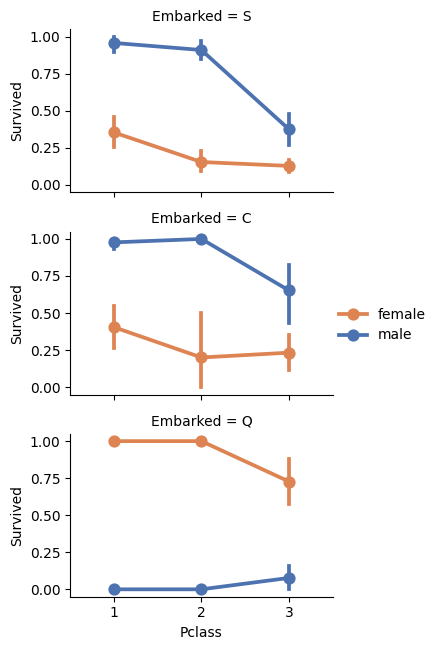

In [90]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlacionando características categóricas e numéricas

Também podemos querer correlacionar características categóricas (com valores não numéricos) e características numéricas. Podemos considerar correlacionar **Embarked** (categórica não numérica), **Sex** (categórica não numérica), **Fare** (numérica contínua), com **Survived** (categórica numérica).

**Observações.**

- Passageiros que pagaram tarifas mais altas tiveram maior taxa de sobrevivência. Confirma nossa suposição de criação (#4) de faixas de tarifa.
- O porto de embarque se correlaciona com as taxas de sobrevivência. Confirma a correlação (#1) e a necessidade de completar (#2).

**Decisões.**

- Considerar categorizar o recurso **Fare** em faixas.

c:\Users\renat\Documents\python\Data Science\Titanic\myvenv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


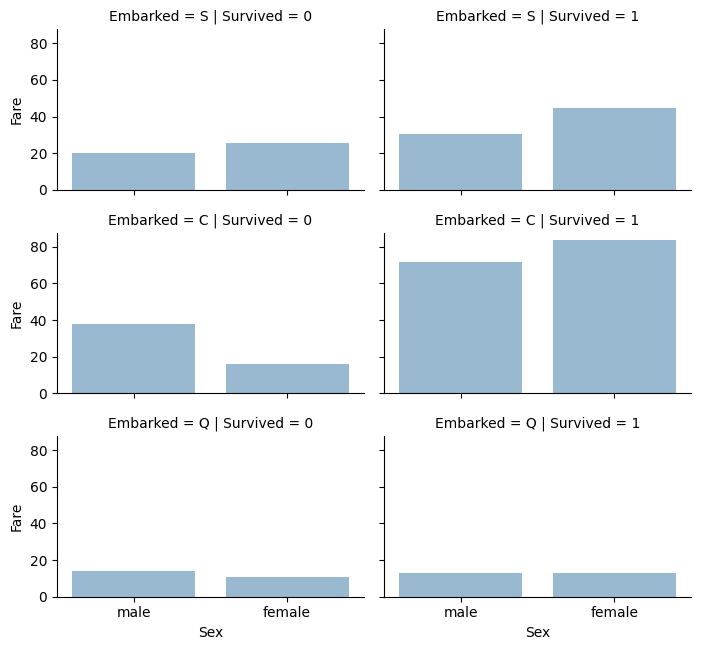

In [100]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6);
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()

## Manipulação dos dados

Coletamos várias suposições e decisões em relação aos nossos conjuntos de dados e aos requisitos da solução. Até agora, não foi necessário alterar nenhuma característica ou valor para chegar a essas conclusões. Vamos agora executar nossas decisões e suposições para os objetivos de correção, criação e completude.

### Corrigindo ao remover características

Este é um bom ponto de partida para execução. Ao remover características, lidamos com menos pontos de dados, o que acelera nosso notebook e facilita a análise.

Com base em nossas suposições e decisões, queremos remover as características **Cabin** (correção #2) e **Ticket** (correção #1).

Observe que, sempre que aplicável, realizamos operações nos conjuntos de dados de treinamento e teste juntos para manter a consistência.

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

### Criando uma nova característica a partir de uma existente

Queremos analisar se a característica **Name** pode ser manipulada para extrair títulos e testar a correlação entre os títulos e a sobrevivência, antes de remover as características **Name** e **PassengerId**.

No código a seguir, extraímos a característica **Title** usando expressões regulares. O padrão RegEx `(\w+\.)` corresponde à primeira palavra que termina com um ponto dentro da característica **Name**. A flag `expand=False` retorna um **DataFrame**.

**Observações.**

Quando plotamos **Title**, **Age**, e **Survived**, observamos o seguinte:

- A maioria dos títulos agrupa as faixas etárias com precisão. Por exemplo: o título **Master** tem uma média de idade de 5 anos.
- A sobrevivência entre as faixas etárias dos títulos varia ligeiramente.
- Certos títulos sobreviveram na maioria das vezes (**Mme**, **Lady**, **Sir**) ou não sobreviveram (**Don**, **Rev**, **Jonkheer**).

**Decisão.**

- Decidimos manter a nova característica **Title** para o treinamento do modelo.

In [101]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\renat\AppData\Local\Temp\ipykernel_7468\4149994435.py:2: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\renat\AppData\Local\Temp\ipykernel_7468\4149994435.py:2: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


NameError: name 'combine' is not defined

We can replace many titles with a more common name or classify them as `Rare`.

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


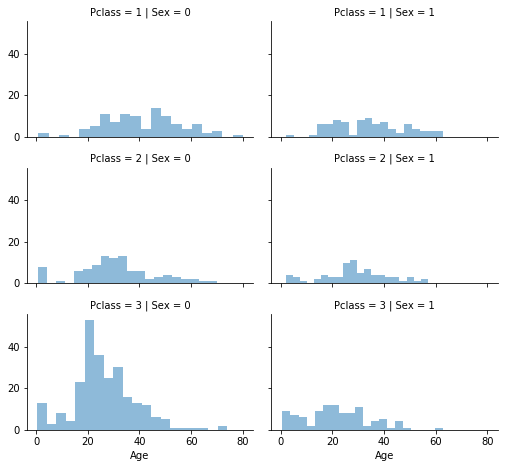

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can not create FareBand.

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.

In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.0

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

In [48]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.56

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [49]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [50]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
6,Stochastic Gradient Decent,78.56
5,Perceptron,78.00
4,Naive Bayes,72.28


In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.

## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)